# <center><span style="color:red">Applications</span></center>
---
## Clustering

In [1]:
Pkg.add("Clustering")

INFO: No packages to install, update or remove
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of Clustering
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
using Clustering
using RDatasets

INFO: Recompiling stale cache file /Users/alage/.julia/lib/v0.6/CodecZlib.ji for module CodecZlib.
INFO: Recompiling stale cache file /Users/alage/.julia/lib/v0.6/DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file /Users/alage/.julia/lib/v0.6/RDatasets.ji for module RDatasets.


In [4]:
# make a random dataset with 1000 points
# each point is a 5-dimensional vector
iris = dataset("datasets", "iris")
head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [6]:
features = permutedims(convert(Array, iris[:,1:4]), [2, 1])   
result = kmeans( features, 3 )                                # want to identify 3 clusters

Clustering.KmeansResult{Float64}([5.88361 5.006 6.85385; 2.74098 3.428 3.07692; 4.38852 1.462 5.71538; 1.43443 0.246 2.05385], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 1, 3, 3, 3, 1, 3, 3, 1], [0.01998, 0.20038, 0.17398, 0.27598, 0.03558, 0.45838, 0.17238, 0.00438, 0.65198, 0.14158  …  0.157337, 0.441953, 0.731626, 0.112722, 0.272722, 0.355799, 0.822118, 0.399645, 0.691953, 0.7072], [61, 50, 39], [61.0, 50.0, 39.0], 78.85566582597737, 6, true)

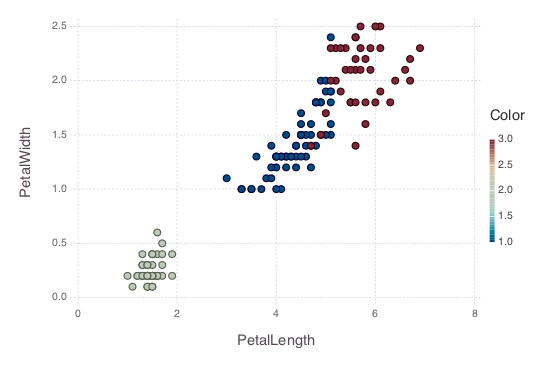

In [9]:
using Gadfly

plot(iris, x = "PetalLength", y = "PetalWidth", color = result.assignments, Geom.point)

#### Linear Regression 

In [11]:
Pkg.add("GLM")

INFO: Package GLM is already installed
INFO: METADATA is out-of-date — you may not have the latest version of GLM
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [12]:
using GLM, RDatasets

INFO: Precompiling module GLM.


In [14]:
form = dataset("datasets", "Formaldehyde")

,Carb,OptDen
1,0.1,0.086
2,0.3,0.269
3,0.5,0.446
4,0.6,0.538
5,0.7,0.626
6,0.9,0.782


In [15]:
#getting linear regression to predict OptDen as a function of Carbon
lm1 = fit(LinearModel, @formula(OptDen ~ Carb), form)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: OptDen ~ 1 + Carb

Coefficients:
               Estimate  Std.Error  t value Pr(>|t|)
(Intercept)  0.00508571 0.00783368 0.649211   0.5516
Carb           0.876286  0.0135345  64.7444    <1e-6


In [44]:
predict(lm1)

6-element Array{Float64,1}:
 0.0927143
 0.267971 
 0.443229 
 0.530857 
 0.618486 
 0.793743 

In [46]:
data = DataFrame(Data=form[:OptDen], Predict=predict(lm1))

,Data,Predict
1,0.086,0.0927143
2,0.269,0.267971
3,0.446,0.443229
4,0.538,0.530857
5,0.626,0.618486
6,0.782,0.793743


#### Graph Theory

In [18]:
Pkg.add("Graphs.jl")

INFO: Installing Graphs v0.9.0
INFO: Package database updated


In [19]:
using Graphs

INFO: METADATA is out-of-date — you may not have the latest version of Graphs
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Precompiling module Graphs.

Use "TopologicalSortVisitor{V}(...) where V" instead.


In [28]:
g = simple_graph(3)

Directed Graph (3 vertices, 0 edges)

In [29]:
add_edge!(g, 1, 2)

edge [1]: 1 -- 2

In [30]:
add_edge!(g, 3, 2)

edge [2]: 3 -- 2

In [31]:
add_edge!(g, 3, 1)

edge [3]: 3 -- 1

In [33]:
g2 =  erdos_renyi_graph(10, 0.5)

Directed Graph (10 vertices, 29 edges)

In [35]:
sp2 = dijkstra_shortest_paths(g2,5)

Graphs.DijkstraStates{Int64,Float64,DataStructures.MutableBinaryHeap{Graphs.DijkstraHEntry{Int64,Float64},DataStructures.LessThan},Int64}([2, 5, 7, 2, 5, 5, 5, 2, 6, 7], [2, 5, 7, 2, 5, 5, 5, 2, 6, 7], [2.0, 1.0, 2.0, 2.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], MutableBinaryHeap(), [4, 1, 7, 5, 0, 2, 3, 6, 9, 8])

In [38]:
sp2.dists

10-element Array{Float64,1}:
 2.0
 1.0
 2.0
 2.0
 0.0
 1.0
 1.0
 2.0
 2.0
 2.0

#### Climate Tools

In [48]:
Pkg.add("ClimateTools")

INFO: Cloning cache of ArgCheck from https://github.com/jw3126/ArgCheck.jl.git
INFO: Cloning cache of AxisArrays from https://github.com/JuliaArrays/AxisArrays.jl.git
INFO: Cloning cache of ClimateTools from https://github.com/Balinus/ClimateTools.jl.git
INFO: Cloning cache of Formatting from https://github.com/JuliaIO/Formatting.jl.git
INFO: Cloning cache of GeoInterface from https://github.com/JuliaGeo/GeoInterface.jl.git
INFO: Cloning cache of IntervalSets from https://github.com/JuliaMath/IntervalSets.jl.git
INFO: Cloning cache of LaTeXStrings from https://github.com/stevengj/LaTeXStrings.jl.git
INFO: Cloning cache of NCDatasets from https://github.com/Alexander-Barth/NCDatasets.jl.git
INFO: Cloning cache of NetCDF from https://github.com/JuliaGeo/NetCDF.jl.git
INFO: Cloning cache of Polynomials from https://github.com/JuliaMath/Polynomials.jl.git
INFO: Cloning cache of ProgressMeter from https://github.com/timholy/ProgressMeter.jl.git
INFO: Cloning cache of PyCall from https://git

In [49]:
using ClimateTools

INFO: Precompiling module NetCDF.
INFO: Precompiling module NCDatasets.
INFO: Precompiling module Shapefile.
INFO: Precompiling module AxisArrays.
INFO: Precompiling module ArgCheck.
INFO: Precompiling module PyCall.
INFO: Precompiling module PyPlot.
Info: Installing matplotlib via Anaconda's /home/charles/.julia/v0.6/Conda/deps/usr/bin/conda...


Solving environment: ...working... done


pyparsing-2.2.0      |   94 KB | ########## | 100% 
backports.functools_ |    9 KB | ########## | 100% 
matplotlib-2.2.2     |  6.5 MB | ########## | 100% 
cycler-0.10.0        |   13 KB | ########## | 100% 
mkl_random-1.0.1     |  361 KB | ########## | 100% 
numpy-base-1.14.5    |  4.1 MB | ########## | 100% 
mkl-2018.0.3         | 198.7 MB | ########## | 100% 
numpy-1.14.5         |   35 KB | ########## | 100% 
kiwisolver-1.0.1     |   85 KB | ########## | 100% 
intel-openmp-2018.0. |  705 KB | ########## | 100% 
pytz-2018.5          |  231 KB | ########## | 100% 
mkl_fft-1.0.2        |  138 KB | ########## | 100% 
blas-1.0             |    6 KB | ########## | 100% 
libgfortran-ng-7.2.0 |  1.2 MB | ########## | 100% 
subprocess32-3.5.2   |   40 KB | ########## | 100% 
twisted-17.5.0       |  4.4 MB | ########## | 100% 


## Package Plan ##

  environment location: /home/charles/.julia/v0.6/Conda/deps/usr

  added / updated specs: 
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pyparsing-2.2.0            |           py27_1          94 KB
    backports.functools_lru_cache-1.5|           py27_1           9 KB
    matplotlib-2.2.2           |   py27hb69df0a_2         6.5 MB
    cycler-0.10.0              |           py27_0          13 KB
    mkl_random-1.0.1           |   py27h4414c95_1         361 KB
    numpy-base-1.14.5          |   py27hdbf6ddf_4         4.1 MB
    mkl-2018.0.3               |                1       198.7 MB
    numpy-1.14.5               |   py27h1b885b7_4          35 KB
    kiwisolver-1.0.1           |   py27hf484d3e_0          85 KB
    intel-openmp-2018.0.3      |                0         705 KB
    pytz-2018.5                |           py27_0         231 KB
   

done
Verifying transaction: ...working... done
Executing transaction: ...working... done


INFO: Precompiling module ProgressMeter.
INFO: Precompiling module Polynomials.
Info: Installing mpl_toolkits.basemap via Anaconda's /home/charles/.julia/v0.6/Conda/deps/usr/bin/conda...


Solving environment: ...working... done


numpy-1.13.3         |  3.9 MB | ########## | 100% 
geos-3.5.0           | 16.9 MB | ########## | 100% 
basemap-1.0.7        | 119.0 MB | #########9 | 100% 


## Package Plan ##

  environment location: /home/charles/.julia/v0.6/Conda/deps/usr

  added / updated specs: 
    - basemap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-1.13.3               |   py27hdbf6ddf_4         3.9 MB
    geos-3.5.0                 |                0        16.9 MB
    basemap-1.0.7              |      np113py27_0       119.0 MB
    ------------------------------------------------------------
                                           Total:       139.7 MB

The following NEW packages will be INSTALLED:

    basemap: 1.0.7-np113py27_0    
    geos:    3.5.0-0              

The following packages will be DOWNGRADED:

    numpy:   1.14.5-py27h1b885b7_4 --> 1.13.3-py27hdbf6ddf_4


Preparing transaction: ...working... 

basemap-1.0.7        | 119.0 MB | ########## | 100% 


done
Verifying transaction: ...working... done
Executing transaction: ...working... done


LoadError: LoadError: InitError: [91mPyError (PyImport_ImportModule

The Python package mpl_toolkits.basemap could not be found by pyimport. Usually this means
that you did not install mpl_toolkits.basemap in the Python version being used by PyCall.

PyCall is currently configured to use the Python version at:

python

and you should use whatever mechanism you usually use (apt-get, pip, conda,
etcetera) to install the Python package containing the mpl_toolkits.basemap module.

One alternative is to re-configure PyCall to use a different Python
version on your system: set ENV["PYTHON"] to the path/name of the python
executable you want to use, run Pkg.build("PyCall"), and re-launch Julia.

Another alternative is to configure PyCall to use a Julia-specific Python
distribution via the Conda.jl package (which installs a private Anaconda
Python distribution), which has the advantage that packages can be installed
and kept up-to-date via Julia.  As explained in the PyCall documentation,
set ENV["PYTHON"]="", run Pkg.build("PyCall"), and re-launch Julia. Then,
To install the mpl_toolkits.basemap module, you can use `pyimport_conda("mpl_toolkits.basemap", PKG)`,
where PKG is the Anaconda package the contains the module mpl_toolkits.basemap,
or alternatively you can use the Conda package directly (via
`using Conda` followed by `Conda.add` etcetera).

) <type 'exceptions.ImportError'>
ImportError('No module named mpl_toolkits.basemap',)
[39m
during initialization of module ClimateTools
while loading /home/charles/.julia/v0.6/ClimateTools/src/ClimateTools.jl, in expression starting on line 136

In [ ]:
# Reading a NetCDF file
C = load("data/sresa1b_ncar_ccsm3-example.nc")

In [ ]:
# Mapping the ClimGrid type
mapclimgrid(C::ClimGrid; region = "World")

In [ ]:
# zooming into a region
mapclimgrid(model, region = "Quebec")

# Indices

More than 20 climate indices are available in the package, such as the annual number of tropical nights, annual maximum and minimum, etc. You can calculate such indices simply with:
annualmax
annualmean
annualmin
annualsum
approx_surfacepressure
customthresover
customthresunder
daysabove10
diurnaltemperature
icingdays
frostdays
prcp1
summerdays
tropicalnights
vaporpressure
wbgt

In [ ]:
maxval = annualmax(C::ClimGrid)

In [ ]:
minval = annualmin(C::ClimGrid)

In [ ]:
plot(maxval, label="Maximum value")
plot(minval, label="Minimum value",titlefig = "Differences in annual minimal and maximal values")